<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev2/S9/EVA4_S9_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-17 20:36:07.279745


## 1. Loading Module and Models 

In [3]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev2 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 7.3MB/s 



## 2. Loading train and test data with transforms and loader functions

In [4]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True



Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [5]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


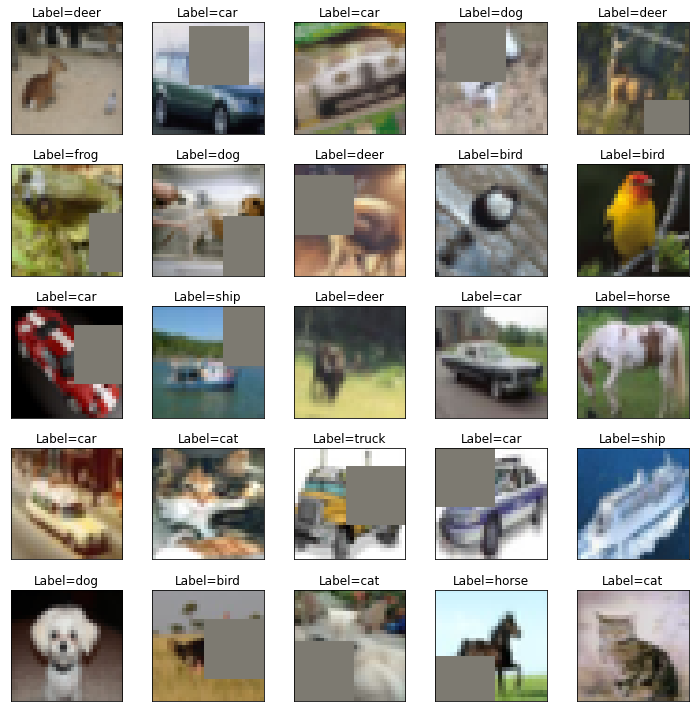

In [6]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [7]:
from EVA4.Models import *

# Loading ResNet18 Model
net = DNN()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [8]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           3,584
       BatchNorm2d-2          [-1, 128, 32, 32]             256
              ReLU-3          [-1, 128, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]           8,256
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]         110,656
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
        MaxPool2d-10          [-1, 256, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]          32,896
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

# Define a Loss function and optimizer

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)

# Training and Testing

In [10]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(16):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=0.9975694417953491 Batch_id=390 Accuracy=48.47: 100%|██████████| 391/391 [01:07<00:00,  6.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5536/10000 (55.36%)


Epoch: 1


Loss=1.1791132688522339 Batch_id=390 Accuracy=60.66: 100%|██████████| 391/391 [01:09<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 6159/10000 (61.59%)


Epoch: 2


Loss=0.8709504008293152 Batch_id=390 Accuracy=66.21: 100%|██████████| 391/391 [01:11<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6759/10000 (67.59%)


Epoch: 3


Loss=1.0842885971069336 Batch_id=390 Accuracy=70.12: 100%|██████████| 391/391 [01:11<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7226/10000 (72.26%)


Epoch: 4


Loss=0.7133692502975464 Batch_id=390 Accuracy=72.11: 100%|██████████| 391/391 [01:12<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 7214/10000 (72.14%)


Epoch: 5


Loss=0.5927446484565735 Batch_id=390 Accuracy=74.16: 100%|██████████| 391/391 [01:11<00:00,  5.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7455/10000 (74.55%)


Epoch: 6


Loss=0.7009825706481934 Batch_id=390 Accuracy=75.67: 100%|██████████| 391/391 [01:11<00:00,  5.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7665/10000 (76.65%)


Epoch: 7


Loss=0.676017165184021 Batch_id=390 Accuracy=77.51: 100%|██████████| 391/391 [01:12<00:00,  5.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7591/10000 (75.91%)


Epoch: 8


Loss=0.5618084669113159 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [01:12<00:00,  5.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7601/10000 (76.01%)


Epoch: 9


Loss=0.5117939710617065 Batch_id=390 Accuracy=79.30: 100%|██████████| 391/391 [01:12<00:00,  5.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8025/10000 (80.25%)


Epoch: 10


Loss=0.5721670389175415 Batch_id=390 Accuracy=80.24: 100%|██████████| 391/391 [01:11<00:00,  5.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8004/10000 (80.04%)


Epoch: 11


Loss=0.4999549984931946 Batch_id=390 Accuracy=80.97: 100%|██████████| 391/391 [01:11<00:00,  5.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8217/10000 (82.17%)


Epoch: 12


Loss=0.5989260077476501 Batch_id=390 Accuracy=81.73: 100%|██████████| 391/391 [01:11<00:00,  5.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7605/10000 (76.05%)


Epoch: 13


Loss=0.5456660985946655 Batch_id=390 Accuracy=82.47: 100%|██████████| 391/391 [01:12<00:00,  5.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8066/10000 (80.66%)


Epoch: 14


Loss=0.7090444564819336 Batch_id=390 Accuracy=83.06: 100%|██████████| 391/391 [01:11<00:00,  5.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8465/10000 (84.65%)


Epoch: 15


Loss=0.6618934869766235 Batch_id=390 Accuracy=83.88: 100%|██████████| 391/391 [01:12<00:00,  5.77it/s]



Test set: Average loss: 0.0036, Accuracy: 8465/10000 (84.65%)

Finished Training


# display an image from the test set

Files already downloaded and verified


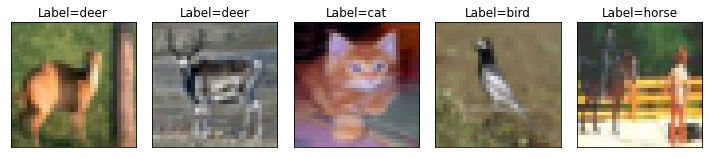

In [11]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

# Prediction of sampe test set

In [12]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:    dog  deer   cat  bird horse


# Plotting Train & Test Accuracy/Losses

Text(0.5, 1.0, 'Test Accuracy')

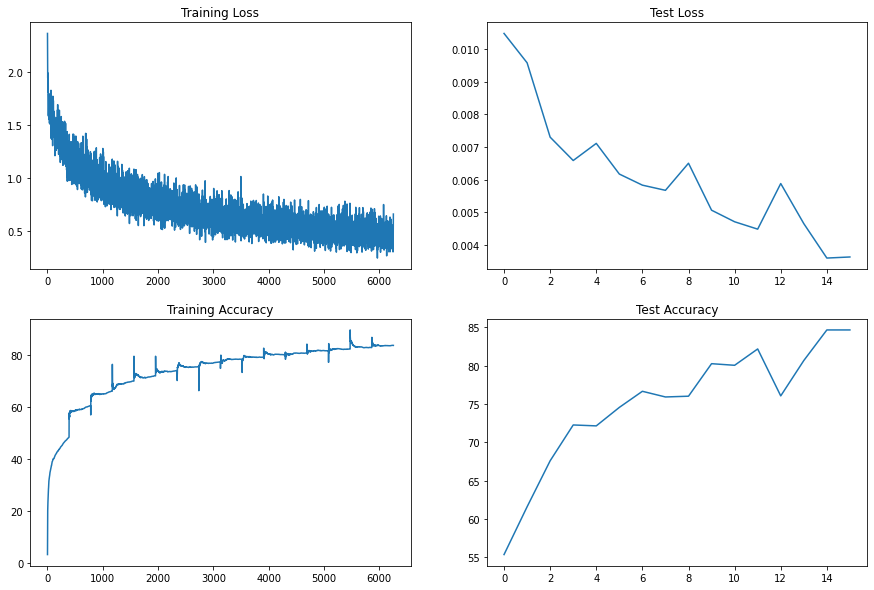

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test.test_acc)
axs[1, 1].set_title("Test Accuracy")

# Evaluating test Accuracy over different classes 

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 76 %
Accuracy of   car : 95 %
Accuracy of  bird : 73 %
Accuracy of   cat : 76 %
Accuracy of  deer : 68 %
Accuracy of   dog : 90 %
Accuracy of  frog : 93 %
Accuracy of horse : 77 %
Accuracy of  ship : 88 %
Accuracy of truck : 86 %
